In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.cluster import k_means
from sklearn.cluster import *
from imutils import paths
import random
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import preprocessing


C:\Users\Devanshi\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [165]:
batch_size = 3
num_classes = 5
epochs = 10
imsize = 128

In [215]:
# input image dimensions
img_x, img_y = imsize, imsize
input_shape = (img_x, img_y,3)
print(input_shape)

(128, 128, 3)


In [197]:
print("[INFO] loading images...")

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('data/train')))
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
labels = []
data = []
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (128, 128))
    image = img_to_array(image)
    data.append(image)
 
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.25, random_state=42)
 

[INFO] loading images...


In [219]:
le = preprocessing.LabelEncoder()
le.fit(labels)
trainY1 = to_categorical(le.transform(trainY).flatten())
testY1 = to_categorical(le.transform(testY).flatten())

In [169]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [170]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [171]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 53824)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5382500   
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 505       
Total para

In [220]:
model.fit(trainX, trainY1,batch_size=3,validation_data=(testX,testY1), epochs=epochs,verbose=1)

Train on 44 samples, validate on 15 samples
Epoch 1/10
44/44 [==============================] - 6s 137ms/step - loss: 1.6382 - acc: 0.2500 - val_loss: 1.4943 - val_acc: 0.4667
Epoch 2/10
44/44 [==============================] - 5s 116ms/step - loss: 1.5426 - acc: 0.2955 - val_loss: 1.5500 - val_acc: 0.0667
Epoch 3/10
44/44 [==============================] - 5s 113ms/step - loss: 1.4765 - acc: 0.3864 - val_loss: 1.3493 - val_acc: 0.7333
Epoch 4/10
44/44 [==============================] - 5s 106ms/step - loss: 1.4220 - acc: 0.5455 - val_loss: 1.4098 - val_acc: 0.4667
Epoch 5/10
44/44 [==============================] - 5s 113ms/step - loss: 1.1452 - acc: 0.5909 - val_loss: 1.2444 - val_acc: 0.6667
Epoch 6/10
44/44 [==============================] - 5s 116ms/step - loss: 1.2450 - acc: 0.5227 - val_loss: 1.0704 - val_acc: 0.6000
Epoch 7/10
44/44 [==============================] - 5s 113ms/step - loss: 0.9366 - acc: 0.7273 - val_loss: 1.1952 - val_acc: 0.2667
Epoch 8/10
44/44 [==============

In [221]:
y = train_generator.classes

array(['260', '140', '7', '12', '12', '12', '7', '7', '140', '12', '12',
       '7', '140', '260', '140', '260', '110', '140', '7', '110', '140',
       '12', '260', '140', '7', '140', '110', '7', '140', '7', '12',
       '140', '260', '140', '12', '260', '260', '140', '7', '12', '7',
       '7', '110', '140', '260', '12', '140', '7', '260', '12', '7', '12',
       '12', '12', '12', '7', '110', '12', '260'], dtype='<U3')

In [38]:
yp = model.predict_generator(train_generator)

In [39]:
import numpy as np

In [40]:
yp = [np.argmax(x) for x in yp]

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame([y,yp])
df = df.transpose()
df.columns =['t','p']

In [26]:
def softmax(ftr):
    print('compute softmax probabilities')
    num, dim = ftr.shape[0], ftr.shape[1]
    print('num %d dim %d' % (num, dim))
    prob = np.zeros((num, dim), dtype=np.single)
    for i in range(num):
        max_val = np.max(ftr[i, :])
        row = ftr[i, :] - max_val
        exp_val = np.exp(row)
        prob[i, :] = exp_val / np.sum(exp_val)
    return prob 

In [46]:
num_classes = 5
num_values = 59
root = 'C:/Users/Devanshi/Documents/CS259/Google-Landmark-Recognition-master/mini_model/'

conf_mat = np.zeros((num_classes,num_classes))


In [47]:
'''
Hardcoding 100-class probabilities for validation images .
'''
class_prob = [14/59,16/59,5/59,14/59,10/59]


val_prob = np.zeros((num_values,num_classes))

for i in range(num_values):
    for j in range(num_classes):
        
        val_prob[i][j]=class_prob[j]
val_prob=softmax(val_prob)
print(val_prob)


compute softmax probabilities
num 59 dim 5
[[0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.17784174 0.2071486  0.1935701 ]
 [0.2071486  0.21429096 0.177

In [48]:
for i in range(df.shape[0]):
    t = df.loc[i]['t']
    p = df.loc[i]['p']
    #print(conf_mat)
    conf_mat[t][p] =     conf_mat[t][p] +1
    #print(conf_mat)
for i in range(num_classes):
    conf_mat[i] = conf_mat[i]/sum(conf_mat[i])


In [224]:
df

,t,p
0,0,2
1,0,1
2,0,1
3,0,4
4,0,0
5,1,1
6,1,4
7,1,4
8,1,2
9,1,2


[[0.2        0.4        0.2        0.         0.2       ]
 [0.125      0.25       0.25       0.         0.375     ]
 [0.21428571 0.21428571 0.21428571 0.         0.35714286]
 [0.2        0.2        0.3        0.1        0.2       ]
 [0.21428571 0.42857143 0.07142857 0.         0.28571429]]


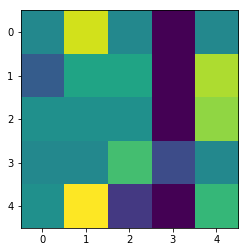

In [50]:
print(conf_mat)
plt.imshow(conf_mat)

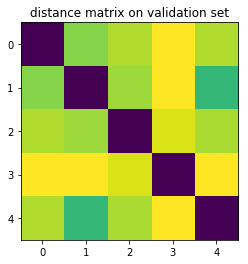

In [51]:
dist_mat = 1 - conf_mat
dist_mat[range(num_classes),range(num_classes)]=0
dist_mat = 0.5 * (dist_mat + dist_mat.T)
plt.figure()
plt.title('distance matrix on validation set')
plt.imshow(dist_mat)

[-0.4472136 -0.4472136 -0.4472136 -0.4472136 -0.4472136]


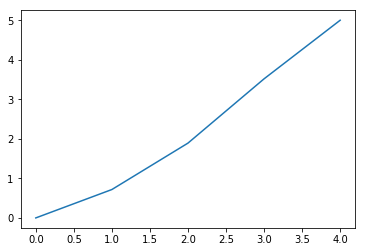

In [56]:
'''Laplacian eigenmap dimensionality reduction
construct adjacency graph W (symmetric) using k-NN'''
W=np.zeros((num_classes,num_classes))

k_nn, t, dim = 2, 0.9, 4

for i in range(num_classes):
    idx=np.argsort(dist_mat[i,:])[1:k_nn+1]
    W[i,idx]=np.exp(-dist_mat[i,idx] / t)
    W[idx,i]=W[i,idx]
D=np.zeros(W.shape)
for i in range(num_classes):
    D[i,i]=np.sum(W[i,:])
L=D-W
eig_val,eig_vec=scipy.linalg.eig(L,D)
ftr=eig_vec[:,1:dim+1]
print(eig_vec[:,0]) # the 1st eigenvector should be all ones
eigval_cumsum = np.cumsum(np.real(eig_val))
plt.plot(eigval_cumsum)

In [57]:
affinity_propagation_cluster = AffinityPropagation(damping=0.75, max_iter=15000, convergence_iter=50, copy=True) 
cluster_labels = affinity_propagation_cluster.fit_predict(ftr)
unique_cluster_label = np.unique(cluster_labels)
n_cluster = unique_cluster_label.shape[0]
cluster_members=[None]*n_cluster
print ('%d clusters' % n_cluster)

3 clusters


In [59]:
label_names=range(5)
for i in range(n_cluster):
    idx = np.nonzero(cluster_labels == unique_cluster_label[i])[0]
    cluster_members[i]=list(idx)
    print ('cluster %d size %d ' % (i, len(idx)))
    for j in range(len(idx)):
        print ('%s,' % label_names[idx[j]],)
    print (' ')
print(cluster_members)

cluster 0 size 3 
0,
1,
2,
 
cluster 1 size 1 
3,
 
cluster 2 size 1 
4,
 
[[0, 1, 2], [3], [4]]


In [63]:
# The number of coarse categories
coarse_categories = n_cluster

# The number of fine categories
fine_categories = num_classes

In [64]:
coarse_categories

3

In [65]:
fine_categories

5

In [66]:
fine2coarse = np.zeros((fine_categories,coarse_categories))
for i in range(coarse_categories):
    for j in cluster_members[i]:
        fine2coarse[j,i] = 1

In [67]:
fine2coarse

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [116]:
len(data)

59

In [117]:
len(labels)

59

In [107]:
type(labels)

list

In [119]:
trainY

array(['140', '7', '12', '12', '110', '12', '7', '260', '7', '260', '12',
       '7', '110', '110', '7', '140', '110', '7', '7', '260', '12', '7',
       '140', '7', '140', '140', '12', '7', '140', '12', '260', '140',
       '260', '12', '260', '7', '260', '140', '7', '110', '140', '140',
       '12', '7'], dtype='<U3')